# Simulating Evolution
#### Today we're going to do some simulation. In other words, we're going to imagine a simple scenario where evolution may occur over time, and explore what happens as we let the system go on its own.

#### What kinds of things might be relevant in this kind of simulation? Before we get there, let's talk about what evolution actually is.

### What is Evolution?

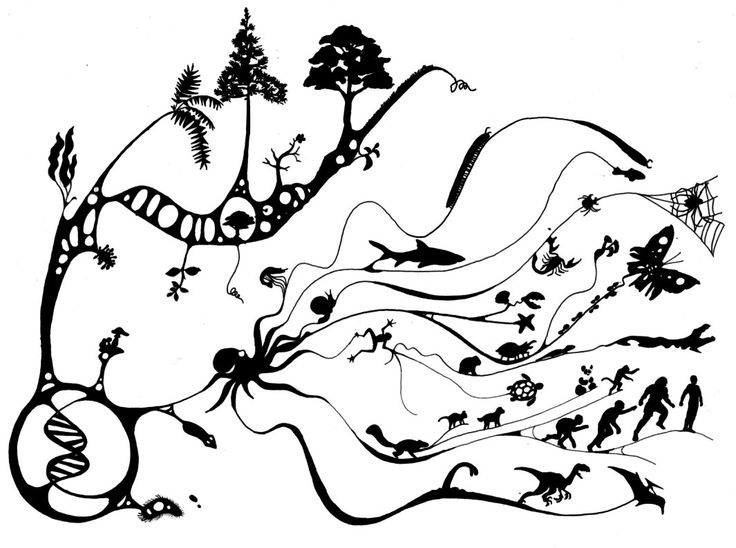

# Evolution is defined as the change in allele frequencies within a population over time.

### That's it! It's that simple. Evolution itself doesn't require new species, or big changes, or anything dramatic. All of those things are possible, but they come out of small changes in populations over many millions of years.

## But wait! If that's all that's happening, how does that create everything we see around us in the natural world? How do changing allele frequencies lead to new species? How can this be the cause of all of the staggering diversity we see around us in the natural world?

### It turns out that Darwin had a set of assumptions, certain facts and observations that he had learned about the world, and if we follow his logic, I think that you may start to see *why* this process can explain almost anything that we see in Biology.

# Assumptions:
## 1. Variation
### Organisms vary from one another, even within a population. We can see this ourselves, even in this classroom. Not everyone is the same height, weight, hair type, etc.. Not everything varies - we all have two hands, one nose, etc., but within any population, you will find variation among individuals.

## 2. Inheritance
### This variation that we see in populations is not completely random, but rather can be passed down from parents to offspring. Traits that we see in both parents can be found in their offspring. Some of these traits are heavily influenced by the environment (for example, height and weight are closely tied to nutrition), while others have almost nothing to do with the environment.

## 3. Populations can grow faster than resources
### As it happens, in most cases in nature, almost any population will grow faster than the environment can provide for. In most natural populations (and even in humans), there will be infant mortality, deaths due to accident, predation, or simply starvation. Not every individual will flourish.

## 4. Those individuals with beneficial traits are more likely to survive
### Now, we combine the previous three points. In any given population, some individuals will happen to have some traits that will help them to survive, thrive, and reproduce. Other individuals will have less beneficial (or even downright detrimental) traits, and these will make it more difficult to survive and to reproduce. Those individuals with more beneficial traits will be more likely to have more offspring, and as a result, those beneficial traits will be more represented in the next generation than they were in the previous generation. The *frequency* of the *alleles* that caused those traits will have *changed* from one generation to the next. In other words - the population has evolved!

## 5. Time
### Over the course of many generations (tens, hundreds, thousands, even millions of generations), these shifts in allele frequency can make profound and sweeping changes. These small shifts from one generation to the next will get magnified over thousands and millions of years, and separate populations may become entirely separate species.

### Imagine if you took several different breeds of dogs, for example let's take Chihuahuas and St. Bernards. If we had two populations of these dogs, separated by breed, and let them breed on their own for hundreds or even thousands of years, they would likely come out on the other as two different species, rather than just two very different breeds of the same species.

### So if that's all evolution is, then how might we simulate it? Well we want an imaginary population in an imaginary environment, and we need there to be some variation in that population to represent the allele frequencies that can change. Let's go ahead and represent this with colors!

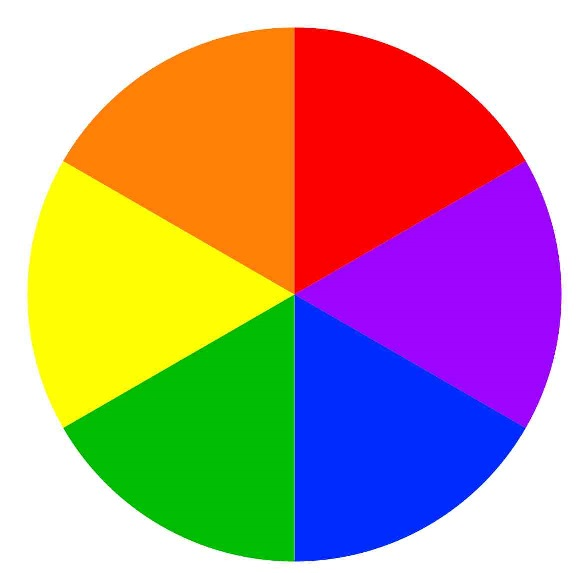

### So in order to do our simulation, let's imagine that the animals in the population can be any of the three primary colors (that is, blue, red, or yellow). Let's also imagine that the environment can be represented by the secondary colors (green, orange, and purple). If the environment is 'purple', we'll say that that's good for red and blue animals, but not as good for yellow animals, and similarly for the other colors. Everyone on the same page so far?

### Now there's one more important step in our simulation: time! We need a way to see how the population is changing. Now, we could do this manually. First we need to come up with some rules for how to go from one generation to the next. I've come up with two sets of rules:

### 1) For each individual, compare the individual's color with the environment color and see how many dice to roll.
### 2) For each die roll, consult the table and determine what happens.

### Color Match Generation Multiplier

| Animal Color | Green Environment | Orange Environment | Purple Environment |
| --- | --- | --- | --- |
| Red | 1 | 3 | 3 |
| Yellow | 3 | 3 | 1 |
| Blue | 3 | 1 | 3 |
| Green | 4 | 2 | 2|
| Purple | 2 | 2 | 4 |
| Orange | 2 | 4 | 2 |

### Die Roll Results

| Die Roll | Result |
| --- | --- |
| 1 | Death |
| 2 | 1 Offspring |
| 3 | 1 Offspring |
| 4 | 2 Offspring |
| 5 | 2 Offspring |
| 6 | Mutation |

### You may be wondering what that mutation is for! We're going to allow random mutations to pop up, so if we get a 6 on a die roll, we're going to create one new individual of a random color, potentially including new colors to match the environment colors!

### Now, this seems like a lot of work, but luckily we can write some code to do most of the heavy lifting for us. This is not a computer science class, so we're not going to talk about any of this code, but the stuff that we're talking about above is how it's going to be working.

In [13]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)


import random
import pandas as pd
from collections import Counter

multipliers = {
    'red':    {'purple': 3, 'orange': 3, 'green': 1},
    'yellow': {'purple': 1, 'orange': 3, 'green': 3},
    'blue':   {'purple': 3, 'orange': 1, 'green': 3},
    'purple': {'purple': 4, 'orange': 2, 'green': 2},
    'orange': {'purple': 2, 'orange': 4, 'green': 2},
    'green':  {'purple': 2, 'orange': 2, 'green': 4}
}

num_gens = 100
carrying_cap = 1000

class Animal:
    def __init__(self, color):
        self.c = color
    def __repr__(self):
        return "A(n) {} animal".format(self.c)
    def __str__(self):
        return "{}".format(self.c)
    def __eq__(self, other):
        return self.c == other.c
    def __hash__(self):
        return hash((self.c))
    def mutate(self):
        new_c = self.c
        colors = {
            1: 'red',
            2: 'yellow',
            3: 'blue',
            4: 'purple',
            5: 'orange',
            6: 'green'
        }
        while new_c == self.c:
            new_c = colors[random.randint(1,6)]
        return new_c
    def next_gen(self, env_color, new_pop):
        num_dice = multipliers[self.c][env_color]
        i = 0
        while i < num_dice:
            roll = random.randint(1,6)
            if roll == 1:
#                 print('death')
                break
            elif roll > 1 and roll < 4:
#                 print(' 1 offspring')
                new_pop.append(Animal(self.c))
            elif roll > 3 and roll < 6:
#                 print('2 offspring')
                new_pop.append(Animal(self.c))
                new_pop.append(Animal(self.c))
            else:
#                 print('mutation')
                new_pop.append(Animal(self.mutate()))
            i += 1

first_gen = [
    Animal('red'),
    Animal('red'),
    Animal('red'),
    Animal('red'),
    Animal('yellow'),
    Animal('yellow'),
    Animal('yellow'),
    Animal('yellow'),
    Animal('blue'),
    Animal('blue'),
    Animal('blue'),
    Animal('blue'),
    ]

env_history = []

def new_generation(prev_gen):
    next_gen = []
    
    environment_states = {
        1: 'purple',
        2: 'orange',
        3: 'green'
    }
    
    environment = environment_states[random.randint(1,3)]
#     environment = 'purple'
    env_history.append(environment)
    
    # print(environment)
    
    for member in prev_gen:
        member.next_gen(environment, next_gen)
        if len(next_gen) >= carrying_cap:
            break
    
    # print(Counter(next_gen))
    random.shuffle(next_gen)
    return next_gen

In [14]:
generations = {}
gen = 1
generations[gen] = (first_gen)

while len(generations.values()) < num_gens:
#     print('GENERATION {}'.format(gen))
#     print(generations[gen])
    gen += 1
    generations[gen] = (new_generation(generations[gen - 1]))
    generations[gen - 1] = Counter(generations[gen - 1])

generations[num_gens] = Counter(generations[num_gens])

df = pd.DataFrame.from_dict(generations, orient='index')
display(tag)

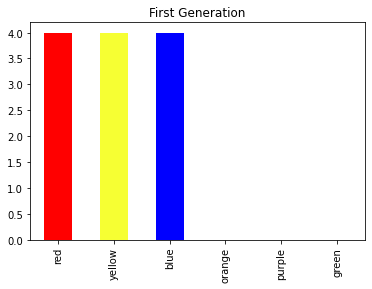

In [4]:
color_dict = {Animal('red'): '#FF0000', Animal('blue'): '#0000FF', Animal('yellow'): '#F6FF33', Animal('green'): '#37FF33', Animal('orange'): '#FB9710', Animal('purple'): '#FB10E9'}

df.loc[1].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns], title='First Generation')
display(tag)

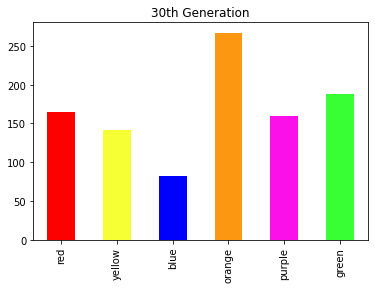

In [5]:
df.loc[30].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns], title='30th Generation')
display(tag)

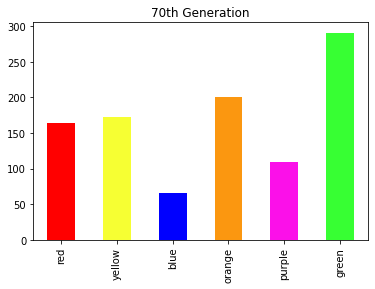

In [6]:
df.loc[70].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns], title='70th Generation')
display(tag)

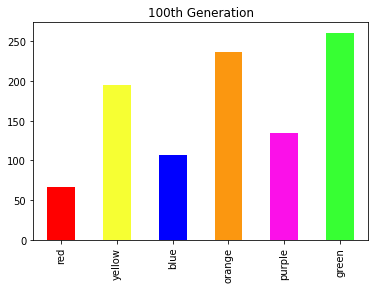

In [7]:
df.loc[100].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns], title='100th Generation')
display(tag)

In [19]:
# redo with only purple env

def new_generation(prev_gen):
    next_gen = []
    
    environment_states = {
        1: 'purple',
        2: 'orange',
        3: 'green'
    }
    
#     environment = environment_states[random.randint(1,3)]
    environment = 'purple'
    env_history.append(environment)
    
    # print(environment)
    
    for member in prev_gen:
        member.next_gen(environment, next_gen)
        if len(next_gen) >= carrying_cap:
            break
    
    # print(Counter(next_gen))
    random.shuffle(next_gen)
    return next_gen

generations = {}
gen = 1
generations[gen] = (first_gen)

while len(generations.values()) < num_gens:
#     print('GENERATION {}'.format(gen))
#     print(generations[gen])
    gen += 1
    generations[gen] = (new_generation(generations[gen - 1]))
    generations[gen - 1] = Counter(generations[gen - 1])

generations[num_gens] = Counter(generations[num_gens])

df = pd.DataFrame.from_dict(generations, orient='index')
display(tag)

### So far we have run this simulation allowing for environmental conditions to switch randomly between orange, purple, and green. Presumably, this means that the populations we saw in this simulation were also fluctuating somewhat randomly. What might happen if there was a persistent environmental change? Let's run the simulation again, but this time the environment is going to be coded as "purple" for every generation.

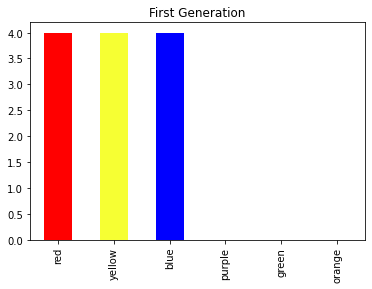

In [20]:
df.loc[1].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns], title='First Generation')
display(tag)

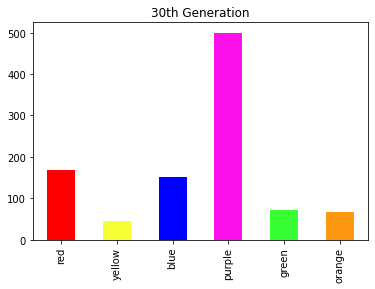

In [21]:
df.loc[30].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns], title='30th Generation')
display(tag)

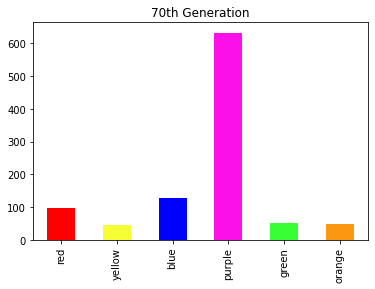

In [22]:
df.loc[70].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns], title='70th Generation')
display(tag)

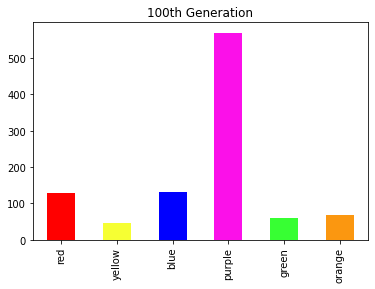

In [23]:
df.loc[100].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns], title='100th Generation')
display(tag)

## So how does this compare with real-world examples of evolution? How can we think about the results of our simulation in terms of real biology?

### Well one classic example that's quite similar to the scenario that we've examined here is the case of the Peppered Moth. This is a species of moth that lives in Great Britain and lives on and around birch trees. Birch trees have white bark, and so in order to blend in, most Peppered Moths are white, with some dark speckles, like pepper. But some individuals are darkers, being mostly black with some white speckles.

### Originally, the lighter form of the moth was most common, because this coloring was the most beneficial to hide from predators, like bats. But during the Industrial Revolution in Britain, there was lots of ash and soot that was being released into the air, and many of the birch trees became covered in ash and soot, making them much darker.

### What do you think happened to the moths? As we said, there were mostly light moths, and some dark moths. Which ones do you think survived? How would the population change in response to this changing environment?

### Eventually, environmental regulations limited the amount of soot and ash that was being released, and the environment got cleaner. The birch trees returned to their previously clean state, presenting their clean white bark once again. How do you think this affected the moth population?

### Another great example would be Darwin's finches. In the Galapagos Islands, Darwin found many different species of finches, little birds, that were all strikingly similar to the species that are found on the nearby mainlaind of Ecuador, but they showed a staggering variety in the shapes and sizes of their beaks, and he found different species on each island, but showing similar traits that seemed ideal to exploit the various different sizes and shapes of seeds on each island.

### If you look back at our simulation, and consider the different "environment colors" to represent the most common seed available for a given year, can you see how the population of finches is changing to take advantage of that shifting food supply?